## 0.pre-operation

In [26]:
import numpy
import torch
import torch.nn as nn
print(numpy.__version__)
print(torch.__version__)

1.18.5
2.4.1+cu124


## 1.属性统计

### 1.1 norm

norm ,指的范数；区别于normalize(正则化)，与vector norm有区别，如下图：
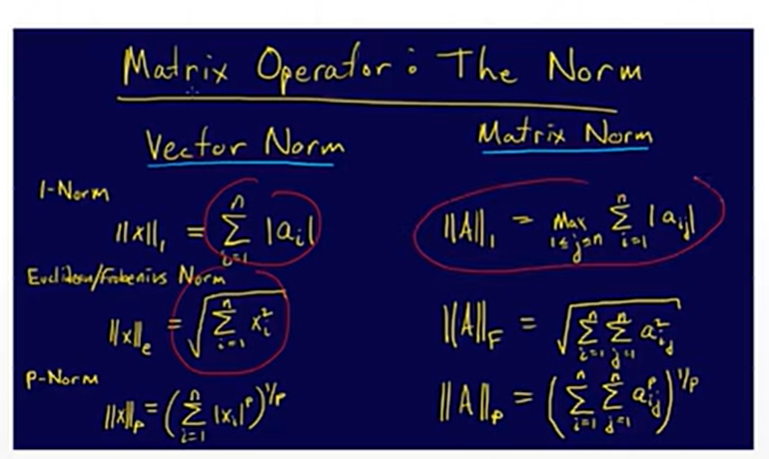

In [10]:
a=torch.full([8],1).float()
b=a.view(2,4)
c=a.view(2,2,2)
print("a\n",a,"\nb\n",b,"\nc\n",c)

a
 tensor([1., 1., 1., 1., 1., 1., 1., 1.]) 
b
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 
c
 tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])


注：mean(1)$\quad$is$\quad$$\Sigma{|x|}$

In [9]:
print("a.norm(1)\n",a.norm(1))
print("b.norm(1)\n",b.norm(1))
print("c.norm(1)\n",c.norm(1))

a.norm(1)
 tensor(8.)
b.norm(1)
 tensor(8.)
c.norm(1)
 tensor(8.)


注： mean(2)$\quad$is$\quad$$\sqrt{\Sigma{{|x|}^2}}$

In [11]:
print("a.norm(2)\n",a.norm(2))
print("b.norm(2)\n",b.norm(2))
print("c.norm(2)\n",c.norm(2))

a.norm(2)
 tensor(2.8284)
b.norm(2)
 tensor(2.8284)
c.norm(2)
 tensor(2.8284)


In [15]:
print(b.norm(1,dim=1),b.norm(1,dim=0))
print(b.norm(2,dim=1),b.norm(2,dim=0))

tensor([4., 4.]) tensor([2., 2., 2., 2.])
tensor([2., 2.]) tensor([1.4142, 1.4142, 1.4142, 1.4142])


In [14]:
print(c.norm(1,dim=2),c.norm(1,dim=1),c.norm(1,dim=0))

tensor([[2., 2.],
        [2., 2.]]) tensor([[2., 2.],
        [2., 2.]]) tensor([[2., 2.],
        [2., 2.]])


### 1.2 mean.sum.min.max.prod(累乘)

In [18]:
a=torch.arange(1,9).reshape(2,4).float()
print(a)
print(a.mean(),a.sum(),a.min(),a.max(),a.prod())#mean = norm(1)/size

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
tensor(4.5000) tensor(36.) tensor(1.) tensor(8.) tensor(40320.)


### 1.3 argmax,argmin

In [22]:
print(a.argmax(),a.argmax(1),a.argmax(0)) #找出最大值的index值

tensor(7) tensor([3, 3]) tensor([1, 1, 1, 1])


In [27]:
a=torch.randn(4,10)
print(a)
print(a.min(),a.max())#mean = norm(1)/size
print(a.argmax(),a.argmax(1),a.argmax(0)) #找出最大值的index值

tensor([[-3.5605e-01,  3.9355e-01, -5.4431e-01,  8.2772e-01,  1.2288e+00,
         -1.1585e-01, -8.0189e-02, -1.1516e+00,  2.6994e-01, -5.2153e-01],
        [-8.3678e-02,  3.1224e-01, -2.1154e+00, -1.4329e-01, -1.5486e-01,
         -1.3233e+00,  7.7254e-01, -2.1591e-01, -3.2922e-01,  7.1823e-02],
        [ 1.0042e+00,  1.0129e+00, -6.9210e-01,  1.2237e-01, -1.0131e-03,
         -6.2901e-01, -6.9082e-01, -1.2826e+00, -1.9240e-01, -7.3705e-02],
        [-8.1100e-02,  4.5237e-01,  1.0730e+00,  2.9983e-01,  8.8766e-01,
          3.2506e-02,  9.6159e-01,  1.0432e+00, -7.5607e-01,  4.6455e-01]])
tensor(-2.1154) tensor(1.2288)
tensor(4) tensor([4, 6, 1, 2]) tensor([2, 2, 3, 0, 0, 3, 3, 3, 0, 3])


### 1.4 dim keepdim(两个参数）

In [35]:
print(a.max(dim=1)) #dim参数，能够展示每个维度上的最大最小值并且给出index
print("-------------------")
print(a.max(dim=0))
print("-------------------")
print(a.argmax(dim=1))

torch.return_types.max(
values=tensor([1.2288, 0.7725, 1.0129, 1.0730]),
indices=tensor([4, 6, 1, 2]))
-------------------
torch.return_types.max(
values=tensor([1.0042, 1.0129, 1.0730, 0.8277, 1.2288, 0.0325, 0.9616, 1.0432, 0.2699,
        0.4645]),
indices=tensor([2, 2, 3, 0, 0, 3, 3, 3, 0, 3]))
-------------------
tensor([4, 6, 1, 2])


In [36]:
print(a.max(dim=1,keepdim=True)) ##keepdim，保持输出维度不变[4][1]
print(a.max(dim=0,keepdim=True)) [1][10]

torch.return_types.max(
values=tensor([[1.2288],
        [0.7725],
        [1.0129],
        [1.0730]]),
indices=tensor([[4],
        [6],
        [1],
        [2]]))
torch.return_types.max(
values=tensor([[1.0042, 1.0129, 1.0730, 0.8277, 1.2288, 0.0325, 0.9616, 1.0432, 0.2699,
         0.4645]]),
indices=tensor([[2, 2, 3, 0, 0, 3, 3, 3, 0, 3]]))


### 1.4 topk(k个最大的元素)

In [38]:
a=torch.randn(4,10)
print(a)
print("---------------------")
print(a.topk(3,dim=1))  #输出为dim=1维度上最大的三个数及其index
print(a.topk(3,dim=1,largest=False))  #前k个最小值

tensor([[ 0.8394, -0.5607, -0.5701, -0.2612, -0.4578, -0.7794, -0.9787, -0.0794,
         -0.4368, -0.0348],
        [-0.4463, -1.2260, -0.2181,  0.7667, -0.5139, -2.0114, -0.5766,  1.1680,
          0.9267,  0.6464],
        [-0.1442, -0.7327,  1.5848,  1.2745, -0.6927,  0.5505,  0.8980,  1.2491,
         -1.0353,  0.4760],
        [-0.0285, -0.1242,  2.1610,  1.2002, -1.5009,  1.2488,  1.1034,  0.9339,
          0.1593, -0.5000]])
---------------------
torch.return_types.topk(
values=tensor([[ 0.8394, -0.0348, -0.0794],
        [ 1.1680,  0.9267,  0.7667],
        [ 1.5848,  1.2745,  1.2491],
        [ 2.1610,  1.2488,  1.2002]]),
indices=tensor([[0, 9, 7],
        [7, 8, 3],
        [2, 3, 7],
        [2, 5, 3]]))
torch.return_types.topk(
values=tensor([[-0.9787, -0.7794, -0.5701],
        [-2.0114, -1.2260, -0.5766],
        [-1.0353, -0.7327, -0.6927],
        [-1.5009, -0.5000, -0.1242]]),
indices=tensor([[6, 5, 2],
        [5, 1, 6],
        [8, 1, 4],
        [4, 9, 1]]))


In [40]:
print(a.kthvalue(10,dim=1))  #kthvalue返回第n个最小值。只会返回1个
print(a.kthvalue(1))

torch.return_types.kthvalue(
values=tensor([0.8394, 1.1680, 1.5848, 2.1610]),
indices=tensor([0, 7, 2, 2]))
torch.return_types.kthvalue(
values=tensor([-0.9787, -2.0114, -1.0353, -1.5009]),
indices=tensor([6, 5, 8, 4]))


### 1.5 torch.eq(a,b)

In [44]:
print(torch.eq(a,a))
b=torch.zeros(4,10)
print(torch.eq(a,b))


tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])
tensor([[False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False, False]])


In [48]:
print(torch.lt(a,b))
print(torch.le(a,1))
print(torch.ge(a,0))
print(torch.gt(a,0))

tensor([[False,  True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True, False,  True,  True,  True, False, False, False],
        [ True,  True, False, False,  True, False, False, False,  True, False],
        [ True,  True, False, False,  True, False, False, False, False,  True]])
tensor([[ True,  True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True, False,  True,  True],
        [ True,  True, False, False,  True,  True,  True, False,  True,  True],
        [ True,  True, False, False,  True, False, False,  True,  True,  True]])
tensor([[ True, False, False, False, False, False, False, False, False, False],
        [False, False, False,  True, False, False, False,  True,  True,  True],
        [False, False,  True,  True, False,  True,  True,  True, False,  True],
        [False, False,  True,  True, False,  True,  True,  True,  True, False]])
tensor([[ True, False, False, False, 